In [1]:
import pandas as pd
import numpy as np
from scipy import sparse

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
train=pd.read_csv(r"C:\Users\yjhut\Downloads\open (2)\train.csv")
test=pd.read_csv(r"C:\Users\yjhut\Downloads\open (2)\test.csv")
sub=pd.read_csv(r"C:\Users\yjhut\Downloads\open (2)\sample_submission.csv")

In [3]:
all_data=pd.concat([train,test])
all_data=all_data.drop(['ID','Y_LABEL'],axis=1)
y=train['Y_LABEL']

In [4]:
cat_feat=['COMPONENT_ARBITRARY','YEAR']

In [5]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in cat_feat:
    all_data[col]=le.fit_transform(all_data[col])

In [6]:
test_features = ['COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR' , 'ANONYMOUS_2', 
                       'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX',
                       'TI', 'V', 'V40', 'ZN']

In [7]:
import numpy as np

for col in all_data.columns:
    if (all_data[col].skew() > 1) & (col not in cat_feat):
        all_data[col]=np.log1p(all_data[col])

In [8]:
for col in all_data.columns:
    print(f'{col}의 왜도: {all_data[col].skew()}')

COMPONENT_ARBITRARY의 왜도: -0.30998471949369155
ANONYMOUS_1의 왜도: 0.92806007139913
YEAR의 왜도: 0.22174551234215195
SAMPLE_TRANSFER_DAY의 왜도: 0.8860209917359103
ANONYMOUS_2의 왜도: 1.775394515731257
AG의 왜도: 6.626074419442079
AL의 왜도: 1.7827536078796387
B의 왜도: 0.1689857381245084
BA의 왜도: 2.176642043002787
BE의 왜도: 23.41246613367368
CA의 왜도: 0.3909276364744638
CD의 왜도: 11.270203503374255
CO의 왜도: 8.683257806447903
CR의 왜도: 1.3071754799937771
CU의 왜도: 0.7766838377803884
FH2O의 왜도: 3.9126019100707707
FNOX의 왜도: 0.5920925706811023
FOPTIMETHGLY의 왜도: 0.27759232659596755
FOXID의 왜도: 0.2772941266786784
FSO4의 왜도: 0.9179124087978058
FTBN의 왜도: 0.3365223246862715
FE의 왜도: 0.30145847401280623
FUEL의 왜도: 4.38207803538793
H2O의 왜도: 17.423928578426313
K의 왜도: 0.8739500260684709
LI의 왜도: 5.496954375662121
MG의 왜도: 0.9606575673295213
MN의 왜도: 1.4046868223786946
MO의 왜도: 1.1959468675591507
NA의 왜도: 0.6054741752931644
NI의 왜도: 2.938737170089025
P의 왜도: -0.6225518855899641
PB의 왜도: 1.6815114658890873
PQINDEX의 왜도: 0.8058731680639973
S의 왜도: 

In [9]:
all_data=all_data[test_features]

In [272]:
for col in all_data.columns:
    print(f'{col}의 왜도: {all_data[col].skew()}')

COMPONENT_ARBITRARY의 왜도: -0.30998471949369155
ANONYMOUS_1의 왜도: 0.92806007139913
YEAR의 왜도: 0.22174551234215195
ANONYMOUS_2의 왜도: 1.775394515731257
AG의 왜도: 6.626074419442079
CO의 왜도: 8.683257806447903
CR의 왜도: 1.3071754799937771
CU의 왜도: 0.7766838377803884
FE의 왜도: 0.30145847401280623
H2O의 왜도: 17.423928578426313
MN의 왜도: 1.4046868223786946
MO의 왜도: 1.1959468675591507
NI의 왜도: 2.938737170089025
PQINDEX의 왜도: 0.8058731680639973
TI의 왜도: 4.765990100133919
V의 왜도: 8.114628151612393
V40의 왜도: -0.4643384720955393
ZN의 왜도: 0.23620075786601355


In [323]:
model=Sequential()

model.add(Dense(15,input_dim=18,activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# 간단한 신경망 모델 구성

In [324]:
num_tr=len(train)

alt_tr=all_data[:num_tr]
alt_tt=all_data[num_tr:]

In [325]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val= train_test_split(alt_tr,y, test_size=0.2, random_state=43, stratify=y)

In [326]:
model.compile( optimizer='adam' ,metrics=['binary_accuracy'], loss='binary_crossentropy')

In [327]:
history=model.fit(X_tr,y_tr,epochs=120, batch_size=30, validation_split=0.2)

Epoch 1/120
301/301 [==============================] - 1s 2ms/step - loss: 0.3727 - binary_accuracy: 0.9075 - val_loss: 0.2899 - val_binary_accuracy: 0.9198
Epoch 2/120
301/301 [==============================] - 0s 1ms/step - loss: 0.3693 - binary_accuracy: 0.9079 - val_loss: 0.2804 - val_binary_accuracy: 0.9198
Epoch 3/120
301/301 [==============================] - 0s 2ms/step - loss: 0.3344 - binary_accuracy: 0.9088 - val_loss: 0.2794 - val_binary_accuracy: 0.9198
Epoch 4/120
301/301 [==============================] - 1s 2ms/step - loss: 0.3086 - binary_accuracy: 0.9133 - val_loss: 0.2816 - val_binary_accuracy: 0.9198
Epoch 5/120
301/301 [==============================] - 0s 2ms/step - loss: 0.3267 - binary_accuracy: 0.9114 - val_loss: 0.3740 - val_binary_accuracy: 0.9198
Epoch 6/120
301/301 [==============================] - 0s 2ms/step - loss: 0.3160 - binary_accuracy: 0.9134 - val_loss: 0.3043 - val_binary_accuracy: 0.9198
Epoch 7/120
301/301 [==============================] - 0s 

Epoch 53/120
301/301 [==============================] - 0s 2ms/step - loss: 0.2851 - binary_accuracy: 0.9145 - val_loss: 0.2756 - val_binary_accuracy: 0.9193
Epoch 54/120
301/301 [==============================] - 0s 2ms/step - loss: 0.2849 - binary_accuracy: 0.9144 - val_loss: 0.2766 - val_binary_accuracy: 0.9193
Epoch 55/120
301/301 [==============================] - 0s 2ms/step - loss: 0.2861 - binary_accuracy: 0.9142 - val_loss: 0.2784 - val_binary_accuracy: 0.9193
Epoch 56/120
301/301 [==============================] - 1s 2ms/step - loss: 0.2855 - binary_accuracy: 0.9145 - val_loss: 0.2763 - val_binary_accuracy: 0.9193
Epoch 57/120
301/301 [==============================] - 0s 2ms/step - loss: 0.2846 - binary_accuracy: 0.9144 - val_loss: 0.2751 - val_binary_accuracy: 0.9193
Epoch 58/120
301/301 [==============================] - 0s 2ms/step - loss: 0.2842 - binary_accuracy: 0.9143 - val_loss: 0.2739 - val_binary_accuracy: 0.9193
Epoch 59/120
301/301 [==============================

Epoch 105/120
301/301 [==============================] - 1s 2ms/step - loss: 0.2792 - binary_accuracy: 0.9149 - val_loss: 0.2782 - val_binary_accuracy: 0.9189
Epoch 106/120
301/301 [==============================] - 0s 2ms/step - loss: 0.2807 - binary_accuracy: 0.9150 - val_loss: 0.2848 - val_binary_accuracy: 0.9189
Epoch 107/120
301/301 [==============================] - 1s 2ms/step - loss: 0.2803 - binary_accuracy: 0.9140 - val_loss: 0.2780 - val_binary_accuracy: 0.9193
Epoch 108/120
301/301 [==============================] - 0s 2ms/step - loss: 0.2797 - binary_accuracy: 0.9147 - val_loss: 0.2817 - val_binary_accuracy: 0.9189
Epoch 109/120
301/301 [==============================] - 0s 2ms/step - loss: 0.2788 - binary_accuracy: 0.9152 - val_loss: 0.2804 - val_binary_accuracy: 0.9193
Epoch 110/120
301/301 [==============================] - 1s 2ms/step - loss: 0.2797 - binary_accuracy: 0.9144 - val_loss: 0.2848 - val_binary_accuracy: 0.9189
Epoch 111/120
301/301 [=======================

In [328]:
score=model.evaluate(X_val,y_val)

print(score)

89/89 [==============================] - 0s 1ms/step - loss: 0.3059 - binary_accuracy: 0.9127
[0.3059101700782776, 0.9127349853515625]


In [329]:
pred=model.predict(alt_tt)

189/189 [==============================] - 0s 884us/step


In [330]:
sub['Y_LABEL']=pred

In [322]:
sub.to_csv('submission_sample(11242).csv', index=False)

In [313]:
len(pred)

6041

In [331]:
x_len=np.arange(len(pred))

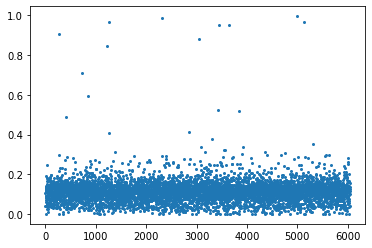

In [332]:
plt.plot(x_len, pred, 'o', markersize=2)


In [318]:
threshold= 0.5

In [319]:
sub.loc[sub['Y_LABEL'] > threshold,'Y_LABEL'] = 1
sub.loc[sub['Y_LABEL'] <= threshold,'Y_LABEL'] = 0

In [321]:
sub['Y_LABEL'].value_counts()

0.0    6028
1.0      13
Name: Y_LABEL, dtype: int64

In [287]:
y.value_counts()

0    12892
1     1203
Name: Y_LABEL, dtype: int64

In [262]:
hist_df=pd.DataFrame(history.history)

In [263]:
hist_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,2.495708,0.815299,0.283971,0.919770
1,0.305470,0.913415,0.278718,0.919770
2,0.303953,0.913415,0.288007,0.919770
3,0.301115,0.913415,0.289774,0.919770
4,0.303404,0.913415,0.283768,0.919770
...,...,...,...,...
595,0.237362,0.925942,0.443725,0.906028
596,0.232335,0.927051,0.427612,0.910018
597,0.233261,0.927494,0.449964,0.908245
598,0.239222,0.926940,0.453066,0.906028


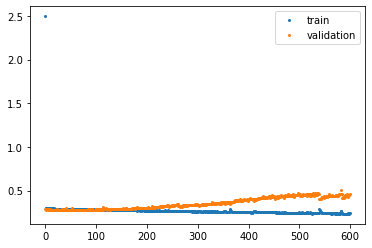

In [264]:
x_len=np.arange(len(hist_df['loss']))
y_loss=hist_df['loss']
y_vloss=hist_df['val_loss']

plt.plot(x_len,y_loss, 'o',markersize=2, label='train')
plt.plot(x_len,y_vloss, 'o',markersize=2, label='validation')
plt.legend(loc=0)
plt.show()